In [8]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
%matplotlib inline
%run -i ../../tools/label_encoder.py
%run -i ../../tools/predict_functions.py

# Biology

### Try with Random Forest

The random forest does not need a Cross Validation because they do some shuffle work inside of them, but anyway in this Project a cross validation will be implemented

In [2]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

In [3]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

### Con Kfold  5

Mean Score: 6.00260209828


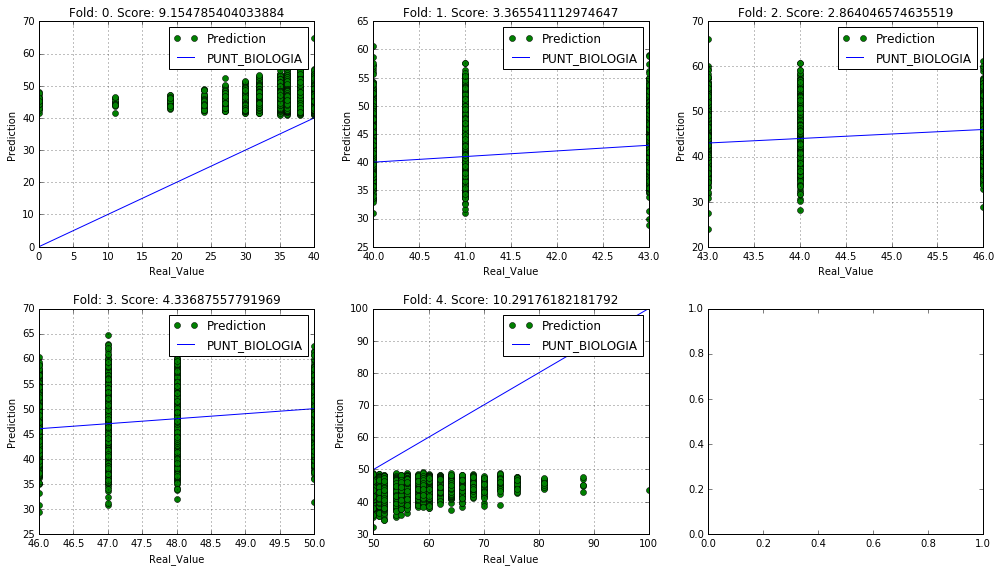

In [11]:
rf = RandomForestRegressor()
kf = KFold(X.shape[0], n_folds=5)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, kf)

### Con Kfold  5 y Shuffle  True

Mean Score: 4.52981912392


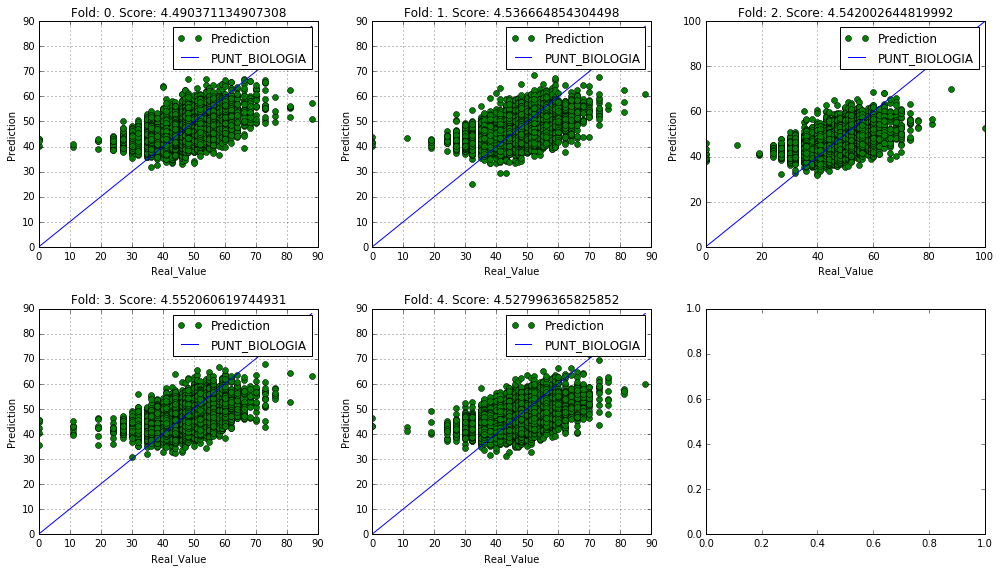

In [12]:
rf = RandomForestRegressor()
kf = KFold(X.shape[0], n_folds=5, shuffle = True)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, kf)

### Con ShuffleSplit

Mean Score: 4.5386845599
elapsed time: 46.650659799575806


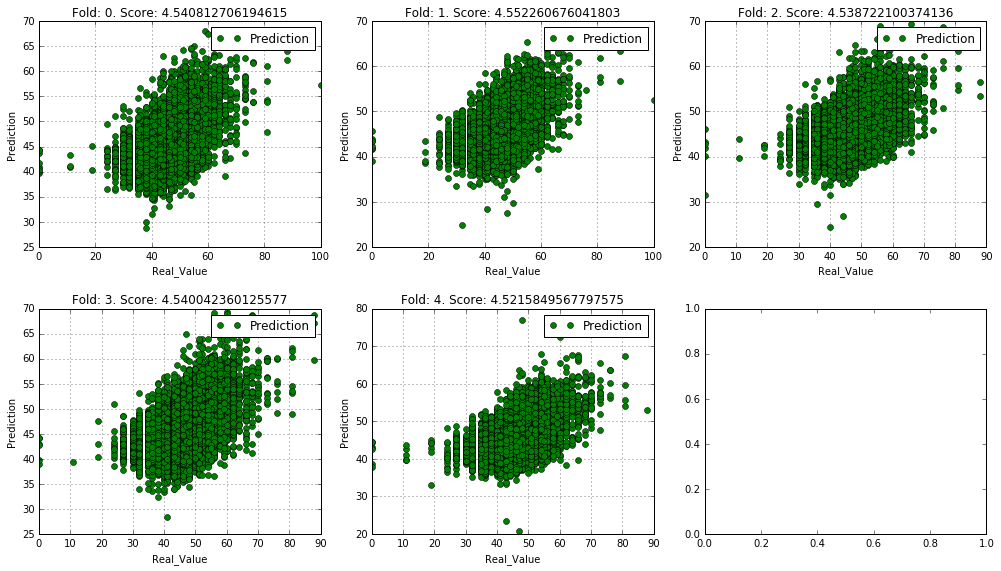

In [6]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
rs = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X, Y, rs)
print('elapsed time:', time()-st)

## Feature Analysis

Here i get the Feature_importances attribute from the Random Forest object and the columns of our features data input.  
Then concatenate them into a Dataframe.  

Then sort them by their importance and select just the columns that has more that 1% of importance in the model.

In [58]:
fi = rf.feature_importances_
cols = X.columns
arr = {'col1':fi, 'col2':cols}
Feature_imp = pd.DataFrame(arr)
Feature_imp.sort_values(by='col1', inplace=True)

In [86]:
S_Feature_imp = Feature_imp.iloc[12:]

In [87]:
S_Feature_imp = S_Feature_imp[['col2']].values #Guarda un array de listas de un elemento / Saves an array of one element lists
New_X_List = [i[0] for i in S_Feature_imp] #Lo convierto 

In [88]:
New_X_List

['ESTU_GENERO',
 'ESTU_ACT_PROX_ANNO',
 'COD_INTERDISCIPLINAR',
 'COLE_CARACTER',
 'ESTU_RESIDE_DEPTO',
 'FAMI_APORTANTES',
 'FAMI_NUM_HERMANOS_EDUSUPERIOR',
 'COLE_JORNADA',
 'FAMI_OCUPA_MADRE',
 'ESTU_CARRDESEADA_RAZON',
 'FAMI_PERSONAS_HOGAR',
 'ESTU_RAZONINSTITUTO',
 'FAMI_OCUPA_PADRE',
 'FAMI_EDUCA_PADRE',
 'FAMI_NUM_HERMANOS',
 'FAMI_EDUCA_MADRE',
 'COLE_VALOR_PENSION',
 'ESTU_RESIDE_MCPIO',
 'ESTU_NACIMIENTO_MES',
 'ESTU_IES_COD_DESEADA',
 'ESTU_NACIMIENTO_DIA',
 'ESTU_NACIMIENTO_ANNO',
 'ESTU_CARRDESEADA_COD',
 'COLE_COD_ICFES',
 'FAMI_INGRESO_FMILIAR_MENSUAL']

## <span style='color: red'> New List of Predictive Variables to USE </span>
Try again with the Random Forest

In [90]:
X2 = X[New_X_List]

Mean Score: 4.53395835868
elapsed time: 59.937546253204346


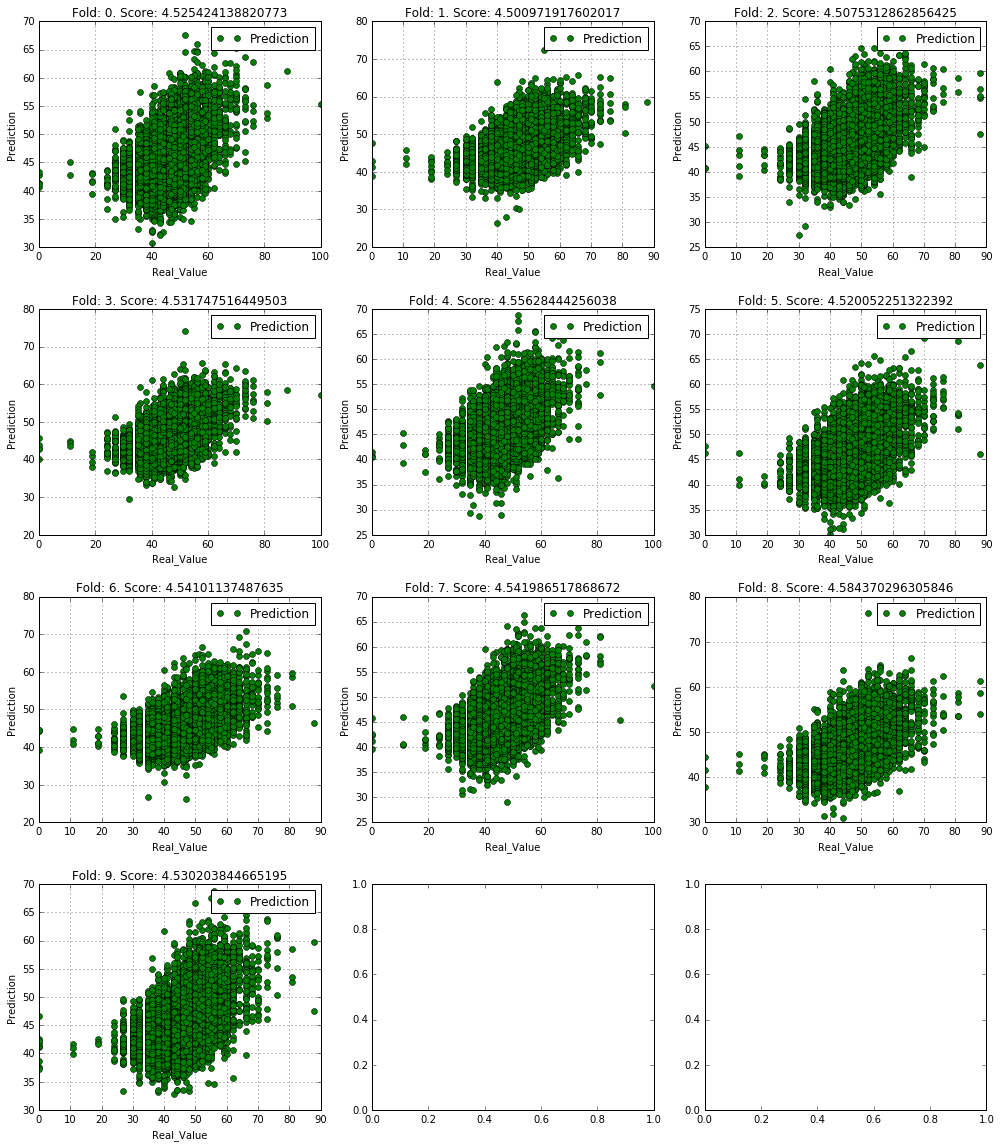

In [93]:
st = time()
rf = RandomForestRegressor(n_jobs=4)
rs = ShuffleSplit(n = X2.shape[0], n_iter=10, test_size=0.2)
plot_predictions_KF(rf, 'PUNT_BIOLOGIA', X2, Y, rs)
print('elapsed time:', time()-st)

## <span style='color: red'> I can see that the score did not improve, BUT the execute time was reduced round 15 seconds</span>

### Exp  2

The Model with the Data raised to the power of 2 gives:
Mean Score: 6.00530565426


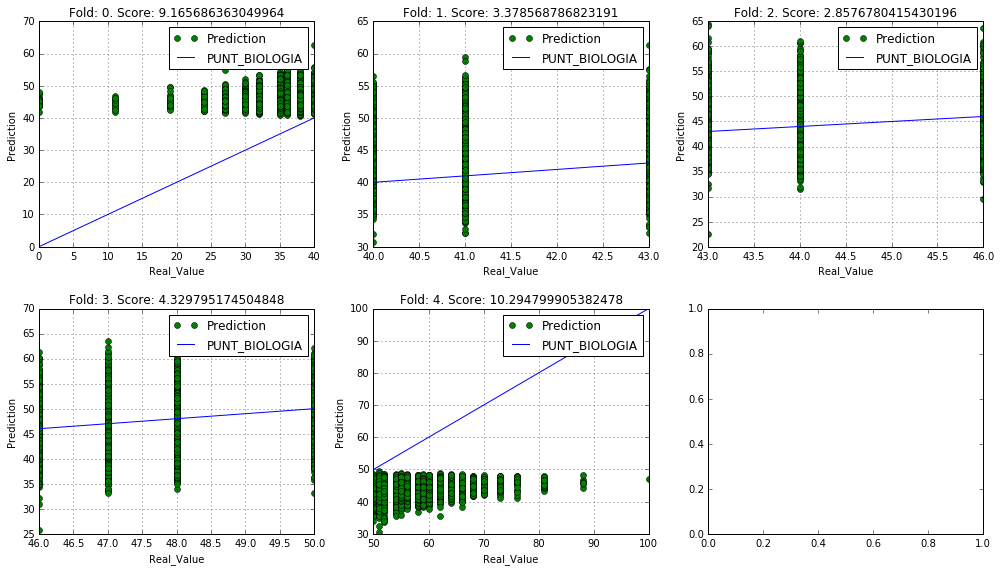

In [17]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.5327218958
This tooks 43.854867935180664


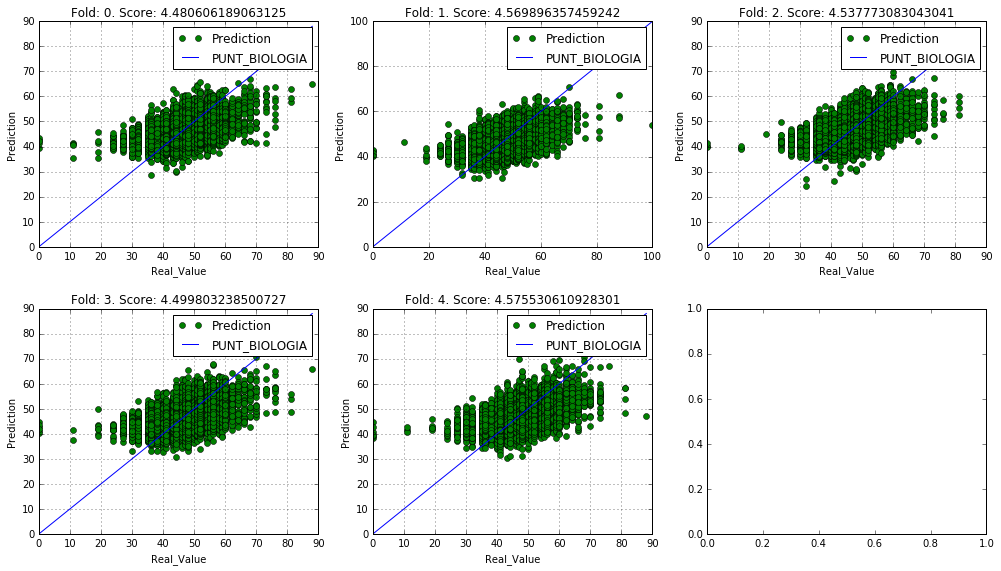

In [6]:
st = time()
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)
print('This tooks', time()-st)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.53152780286
This tooks 44.38910913467407


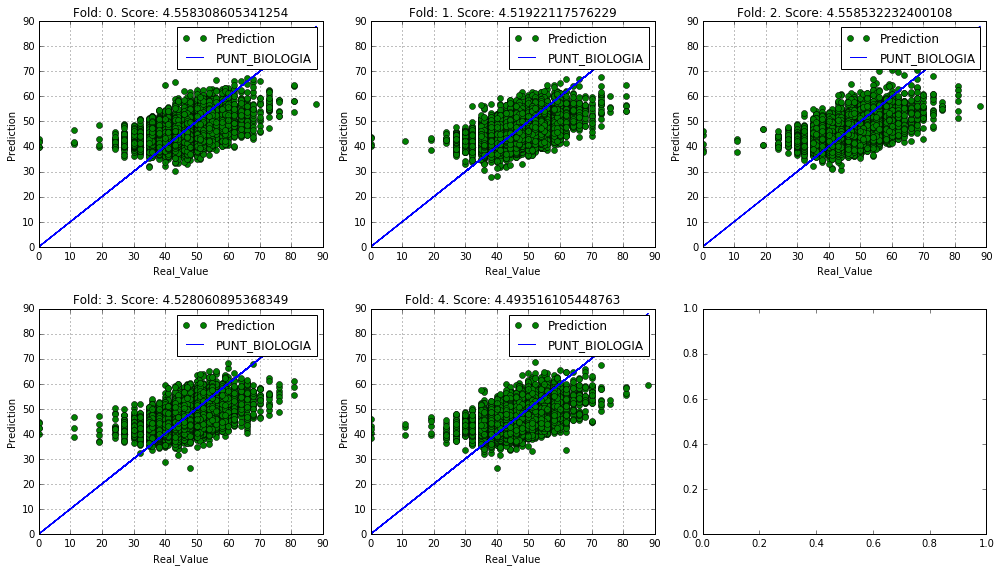

In [7]:
st = time()
rf = RandomForestRegressor()
get_exp_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)
print('This tooks', time()-st)

### EXP 3

The Model with the Data raised to the power of 3 gives:
Mean Score: 6.01001039265


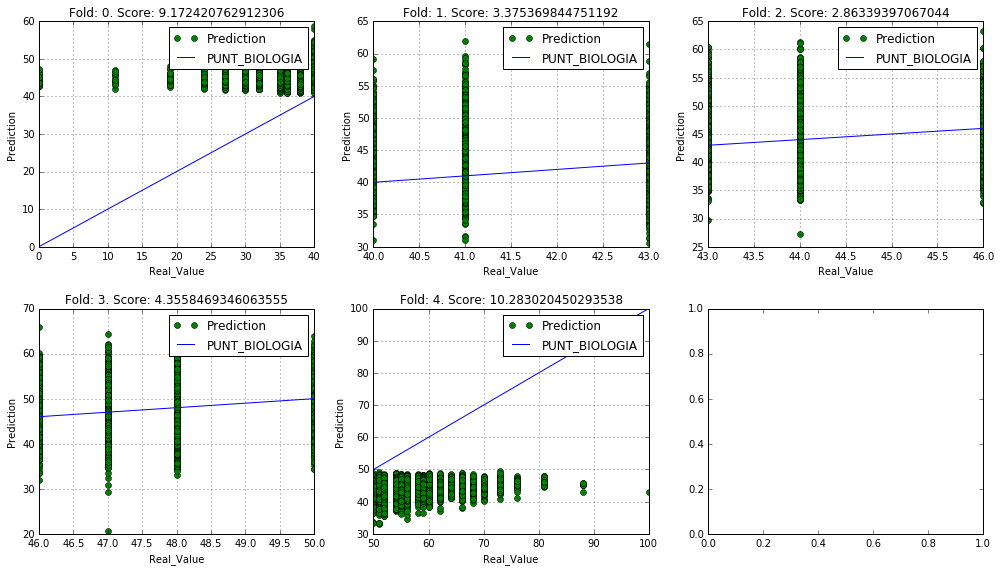

In [20]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.52042813347


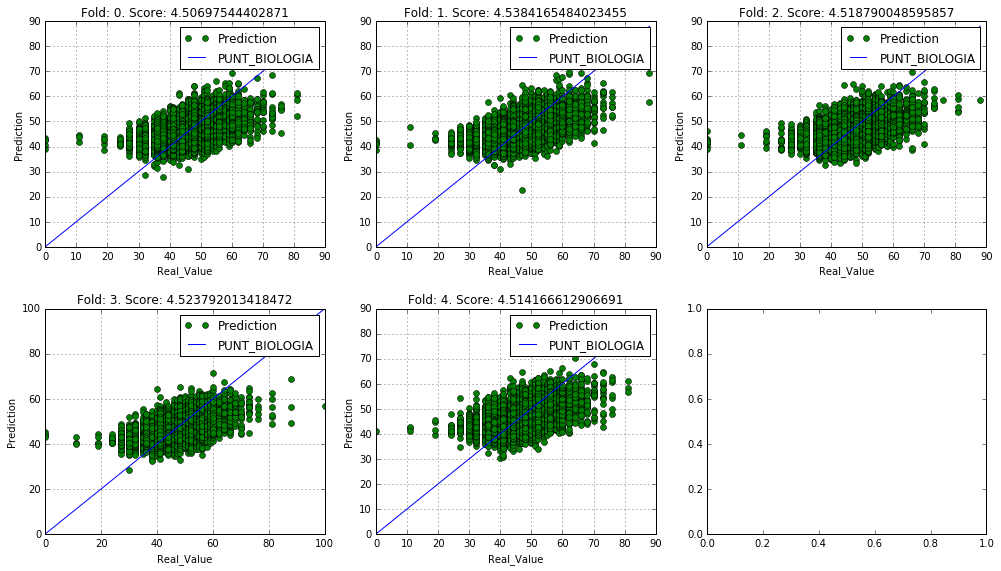

In [21]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle = True)

The Model with the Data raised to the power of 3 gives:
Mean Score: 4.53278636858


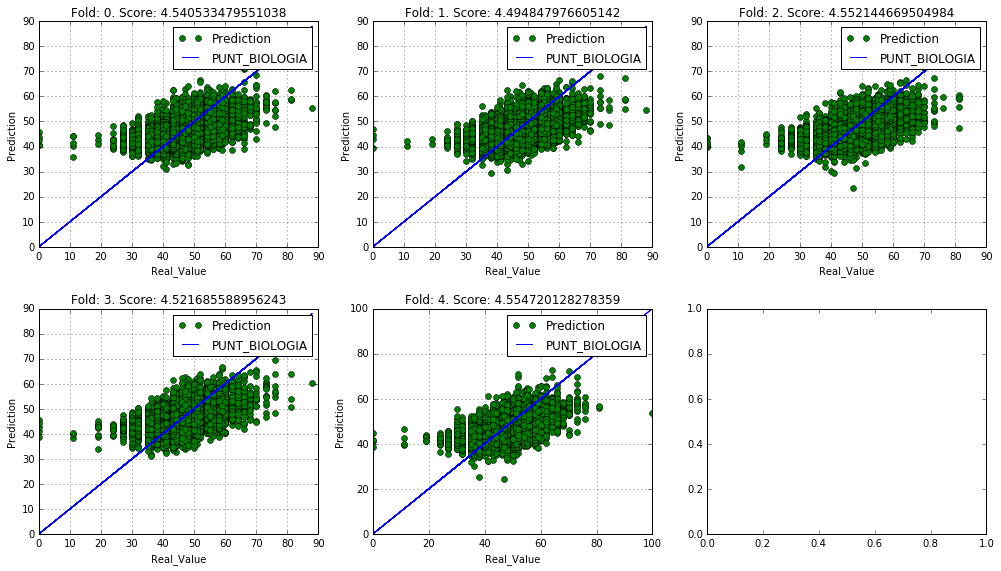

In [22]:
rf = RandomForestRegressor()
get_exp_prediction(rf, 3, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)

### Polynomial Features 2

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 5.99884023652
The prediction took: 1543.2259378433228 seconds


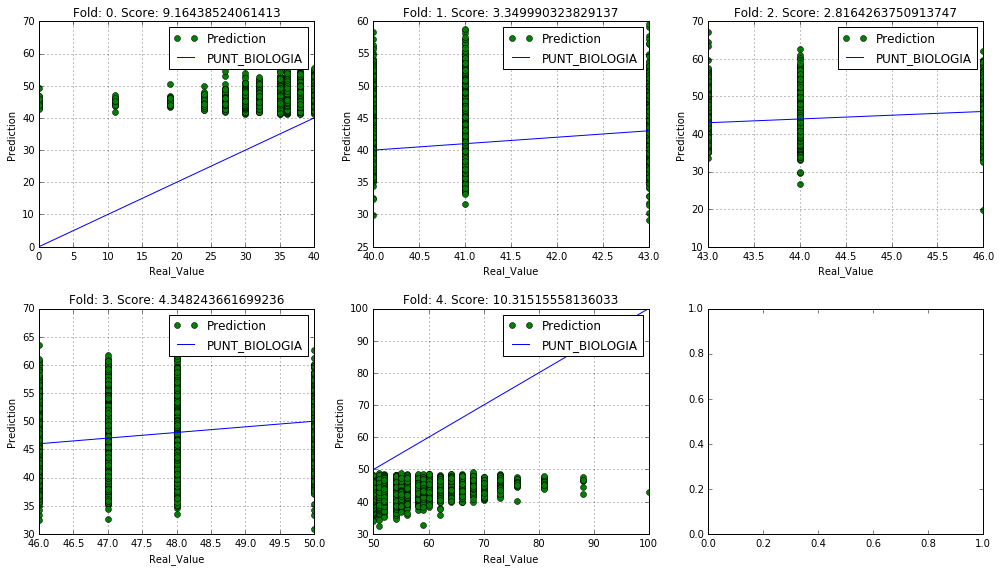

In [25]:
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 4.51956970729
The prediction took: 1417.1782722473145 seconds
this tooks: 1417.1788022518158


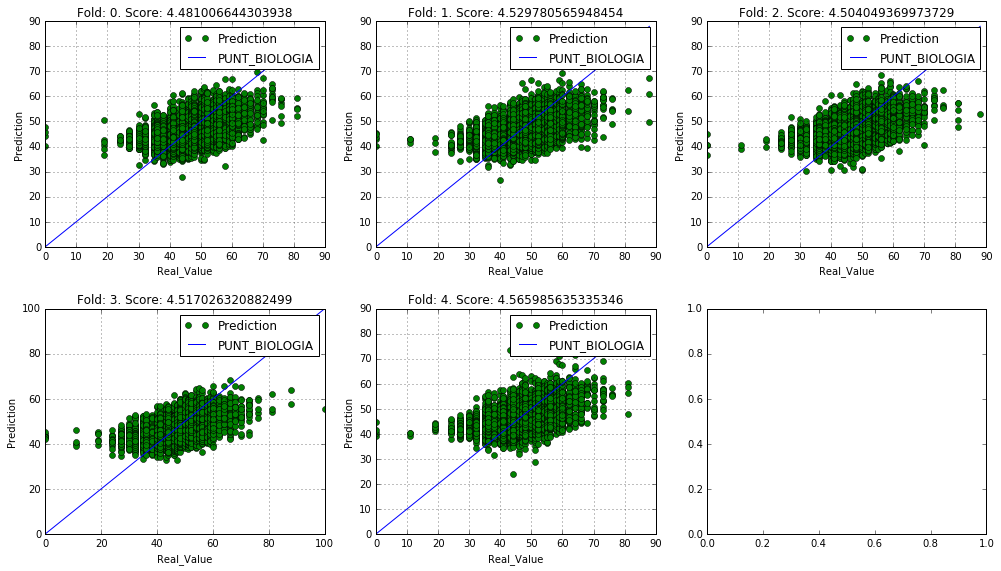

In [8]:
st = time()
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)
print('this tooks:', time()-st)

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 4.51845563092
The prediction took: 1438.4852969646454 seconds


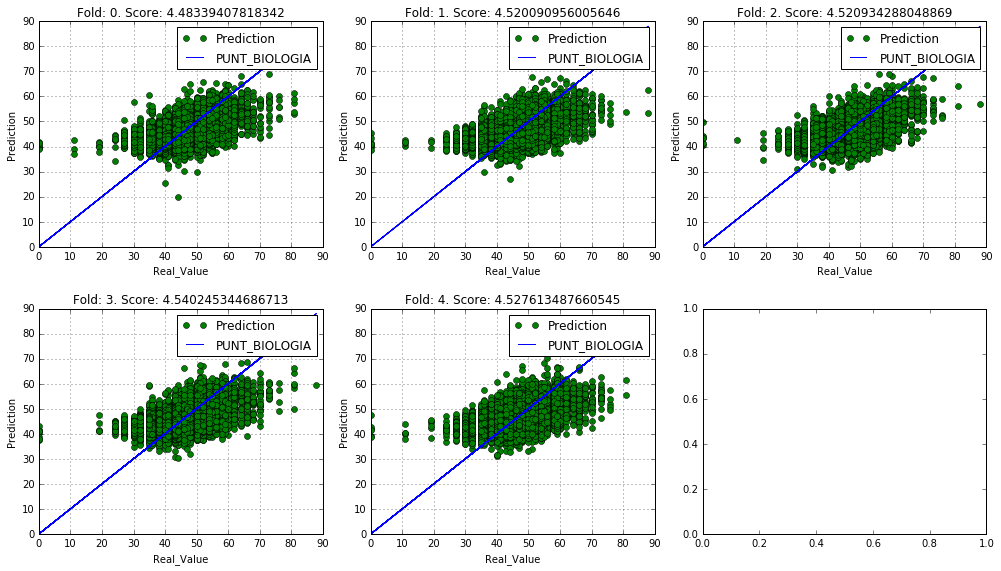

In [ ]:
rf = RandomForestRegressor()
get_Poly_prediction(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split=True)

### Polynomial Features 3
With this degree the Random Forest take too long, so for that reason was not implemented with cross validation.

In [7]:
D_sorted = data_2000.sort_values(by='PUNT_BIOLOGIA')
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
x_list = D_sorted.columns.difference(y_list)
New_X = D_sorted.filter(items = x_list)
Y_train = D_sorted.filter(items = y_list)
Poly = PolynomialFeatures(degree = 3)
Poly_X = Poly.fit_transform(New_X)
print('data ready')
Poly_X = pd.DataFrame(Poly_X)
st = time()
rf = RandomForestRegressor(n_jobs=4, oob_score=True)
rf.fit(Poly_X, Y_train['PUNT_BIOLOGIA'])
print('MAE: ',MAD(Y_train['PUNT_BIOLOGIA'], rf.oob_prediction_))
print('this takes: ', time()-st, 'seconds')

data ready
MAE:  5.474256115702554
this takes:  6607.6687552928925 seconds


/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:687: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


**Now trying with the data reduced**

In [26]:
def get_exp_prediction2(estimator, exp, S_Data, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the estimator
    The exponent
    The sorted data by values of the target to predict
    The column(target) that will be analyzed
    The number of folds that will be created
    KFShuffle if True the Kfolds shuffle the data before split it
    shuffle_split if True the function DON'T use Kfolds, instead use a ShuffleSplit object
    And return the score of the model, and the plot of the prediction"""
    New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    New_X = S_Data.filter(items = New_x_list)
    exped_X = New_X**exp
    Y_train = S_Data.filter(items = y_list)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = exped_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(exped_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    print('The Model with the Data raised to the power of', exp, 'gives:')
    plot_predictions_KF(estimator, target, exped_X, Y_train, kf)

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.527462822
This tooks 35.60808777809143


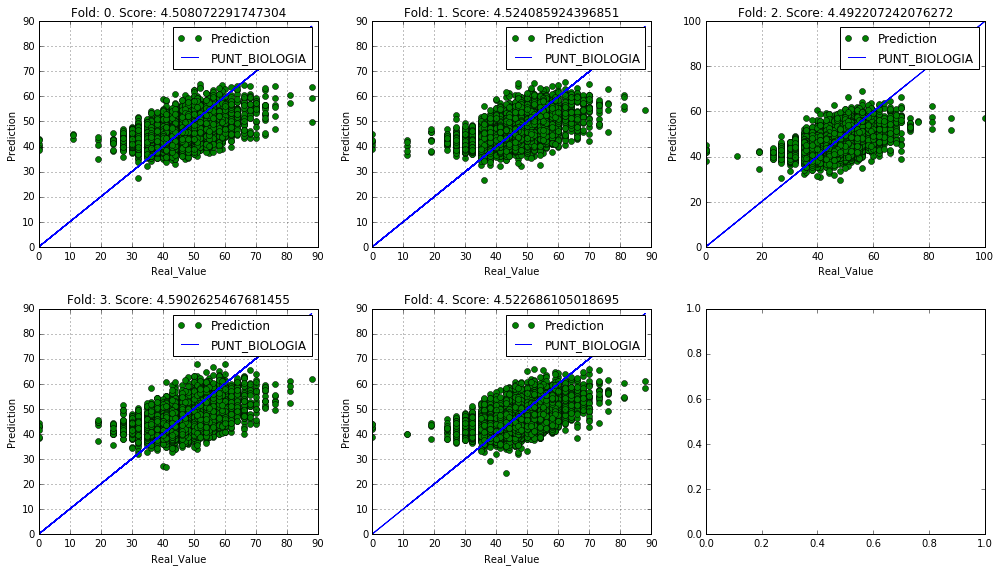

In [10]:
st = time()
rf = RandomForestRegressor()
get_exp_prediction2(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)
print('This tooks', time()-st)

Polynomial features degree 2

In [29]:
def get_Poly_prediction2(estimator, deg, D_sorted, target, folds, KFShuffle = False, shuffle_split = False):
    """Required the degree to the PolynomialFeature object and the sorted data by values of the target,
    return the score of the model, statistics and the plots of the prediction"""
    start_time = time()
    New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    New_X = D_sorted.filter(items = New_x_list)
    Y_train = D_sorted.filter(items = y_list)
    
    Poly = PolynomialFeatures(degree = deg)
    Poly_X = Poly.fit_transform(New_X)
    Poly_X = pd.DataFrame(Poly_X)
    
    if shuffle_split == True:
        kf = ShuffleSplit(n = Poly_X.shape[0], n_iter=5, test_size=(100/(folds*100)))
    else:
        kf = KFold(Poly_X.shape[0], n_folds=folds, shuffle = KFShuffle)
    
    print('The Model with the new "PolyData" with degree', deg, 'gives:')
    plot_predictions_KF(estimator, target, Poly_X, Y_train, kf)
    print('The prediction took:', time()-start_time, 'seconds')

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 4.54954220848
The prediction took: 703.7042772769928 seconds
this tooks: 703.7391061782837


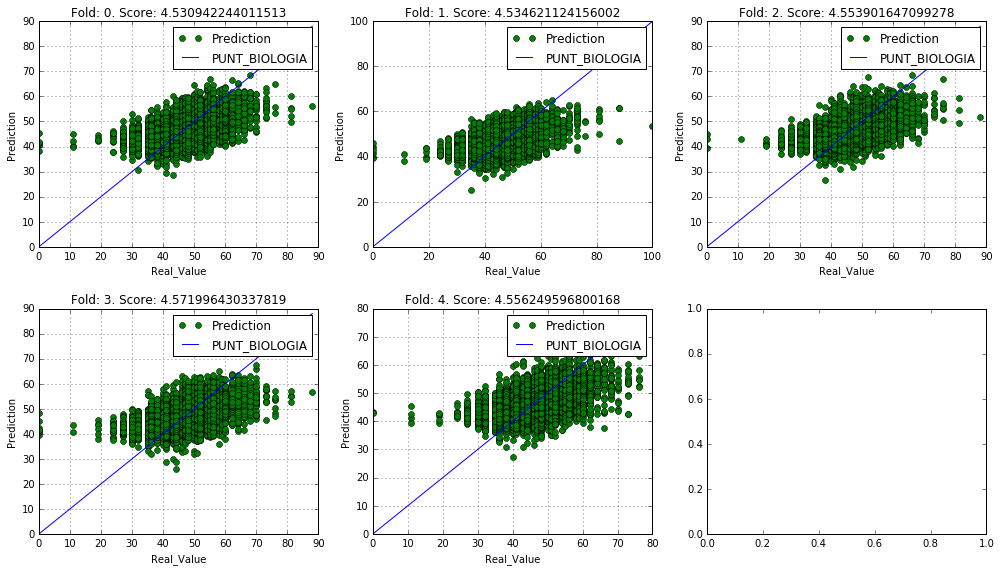

In [8]:
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
rf = RandomForestRegressor()
get_Poly_prediction2(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

## Testing with PCA

In [4]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

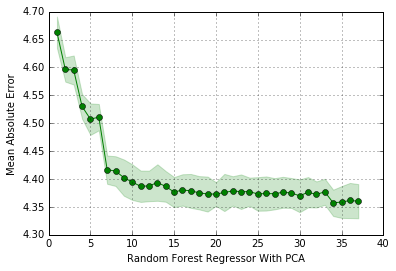

In [16]:
components = range(1,38)
cv = ShuffleSplit(n = X.shape[0], n_iter=5, test_size=0.2, random_state=0)
r = np.array([(np.mean(-j), np.std(-j)) for j in [cross_val_score(RandomForestRegressor(max_depth=10, n_jobs=4),
                                                                PCA(n_components=i).fit_transform(X),
                                                                Y['PUNT_BIOLOGIA'],
                                                                cv=cv,
                                                                scoring = 'mean_absolute_error')
                                               for i in components]])
plt.plot(components, r[:,0], "o-", color="green", label="test")
plt.grid()
plt.fill_between(components, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
plt.xlabel("Random Forest Regressor With PCA")
plt.ylabel("Mean Absolute Error")

In [17]:
print('With', list(r[:,0]).index(min(r[:,0])), 'components we can find the min error of:', min(r[:,0]))

With 33 components we can find the min error of: 4.35725795739


Now with the New X Data

In [18]:
New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']

S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
New_X = S_data.filter(items = New_x_list)
New_Y = S_data.filter(items = y_list)

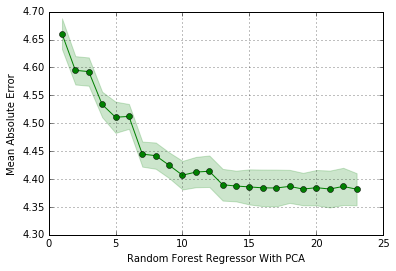

In [19]:
components = range(1,24)
cv = ShuffleSplit(n = New_X.shape[0], n_iter=5, test_size=0.2, random_state=0)
r = np.array([(np.mean(-j), np.std(-j)) for j in [cross_val_score(RandomForestRegressor(max_depth=10, n_jobs=4),
                                                                PCA(n_components=i).fit_transform(New_X),
                                                                New_Y['PUNT_BIOLOGIA'],
                                                                cv=cv,
                                                                scoring = 'mean_absolute_error')
                                               for i in components]])
plt.plot(components, r[:,0], "o-", color="green", label="test")
plt.grid()
plt.fill_between(components, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
plt.xlabel("Random Forest Regressor With PCA")
plt.ylabel("Mean Absolute Error")

In [20]:
print('With', list(r[:,0]).index(min(r[:,0])), 'components we can find the min error of:', min(r[:,0]))

With 22 components we can find the min error of: 4.38168270074


Trying with the PCA, measuring the time

Mean Score: 4.43531634003
This one takes: 23.583704948425293


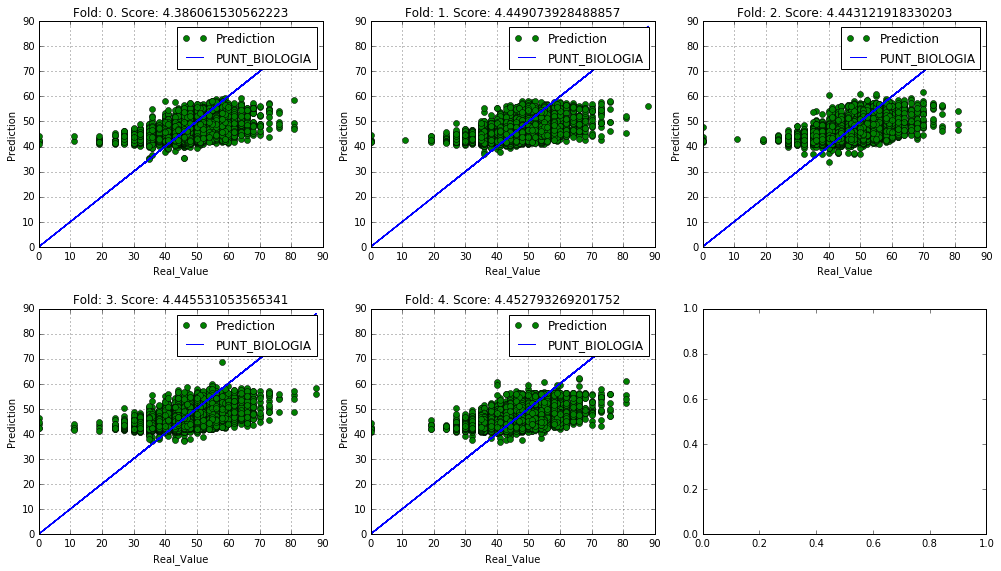

In [21]:
st = time()
pca = PCA(n_components=33)
pca_X = pca.fit_transform(X)
pca_X = pd.DataFrame(pca_X)
dt = RandomForestRegressor(max_depth=6, n_jobs=4)
rs = ShuffleSplit(n = pca_X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(dt, 'PUNT_BIOLOGIA', pca_X, Y, rs)
print('This one takes:', time()-st)

Mean Score: 4.481154482
This one takes: 16.894189596176147


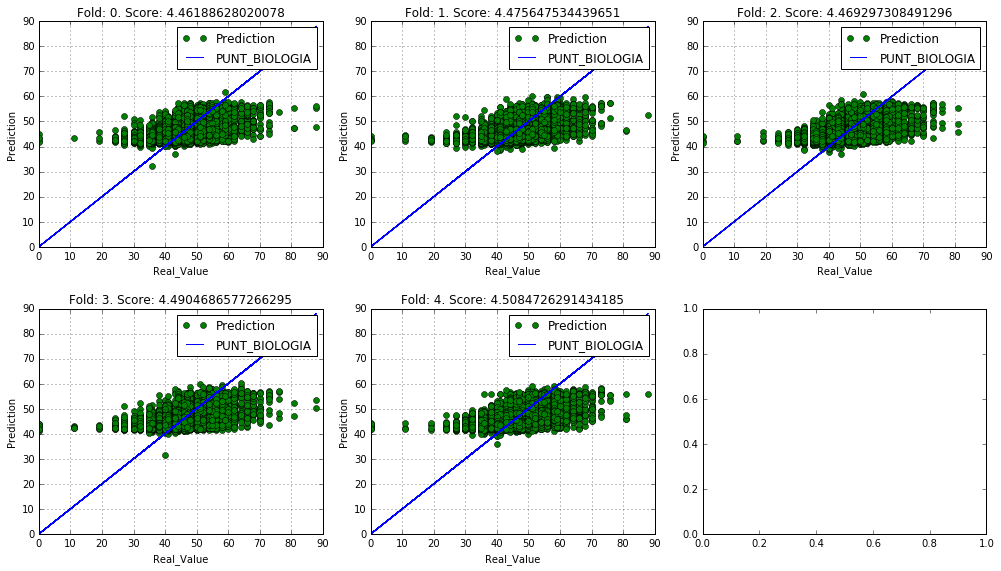

In [22]:
## With the new X data
st = time()
pca = PCA(n_components=22)
pca_New_X = pca.fit_transform(New_X)
pca_New_X = pd.DataFrame(pca_New_X)
dt = RandomForestRegressor(max_depth=6, n_jobs=4)
rs = ShuffleSplit(n = pca_New_X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(dt, 'PUNT_BIOLOGIA', pca_New_X, New_Y, rs)
print('This one takes:', time()-st)

# Results Obtained

|        |1       |    2    |      3     |EXP 2       |||EXP 3       |||Poly 2       |||Poly 3 / No CrossV| PCA-33Components|
|--------|-------:|--------:|-----------:|---:|---:|---:|---:|---:|---:|----:|---:|---:|-----------------:|--------------:|
|        |KFold   |KFShuffle|ShuffleSplit|1   |2   |3   |1   |2   |3   |1    |2   |3   |1                 |3
|Biologia|6.002   |4.52     |4.53       |6.005|4.51|4.52|6.01|4.52|4.53|5.99 |4.52|4.51|5.47              |4.43

The 2 best algorithms are:  

|BEST ALGORITHMS       |Score/time[SEG]    |Score/time[SEG]    |Score/time[SEG]    |
|---------------------:|------------------:|------------------:|------------------:|
|**Algorithm**         |EXP 2/ ShuffleSplit|Poly 2/KFoldShuffle|PCA- 33 Components |
|**Old Data**          |4.53 / 44.38       |4.51 / 1417.17     |4.43/23.58         |
|**New X Data**        |4.52 / 35.60       |4.54 / 703.70      |ERROR              |

So... The predict way **CHOSEN** until now is:

* Random Forest Regressor + Old Data + PCA of 33 Components + ShuffleSplit

___

## Learning Curves

The following used function (*plot_learning_curve*) was taken from the [python documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)  

* Depth Analysis

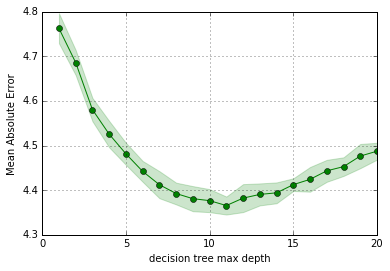

In [23]:
max_depths = range(1,21)
cv = ShuffleSplit(n = New_X.shape[0], n_iter=5, test_size=0.2, random_state=0)
r = np.array([(np.mean(-j), np.std(-j)) for j in [cross_val_score(RandomForestRegressor(max_depth=i),
                                                                pca_X,
                                                                Y['PUNT_BIOLOGIA'],
                                                                cv=cv,
                                                                scoring = 'mean_absolute_error')
                                               for i in max_depths]])
plt.plot(max_depths, r[:,0], "o-", color="green", label="test")
plt.grid()
plt.fill_between(max_depths, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
plt.xlabel("decision tree max depth")
plt.ylabel("Mean Absolute Error")

In [24]:
print('The mean value is:', np.min(r[:,0]))
print(r)

The mean value is: 4.36551690004
[[ 4.76257094  0.03366824]
 [ 4.68582287  0.02808907]
 [ 4.58046287  0.02610475]
 [ 4.52550323  0.0296021 ]
 [ 4.48144405  0.02473652]
 [ 4.4421128   0.02333104]
 [ 4.412266    0.03031119]
 [ 4.39244436  0.0243517 ]
 [ 4.38093141  0.02814474]
 [ 4.37652376  0.02577806]
 [ 4.3655169   0.02017508]
 [ 4.38216755  0.03135501]
 [ 4.39048702  0.02462944]
 [ 4.39401085  0.02336084]
 [ 4.41234896  0.01419909]
 [ 4.42423931  0.02764586]
 [ 4.44330163  0.02459296]
 [ 4.45270609  0.02088596]
 [ 4.47637014  0.02714449]
 [ 4.48729088  0.01884638]]


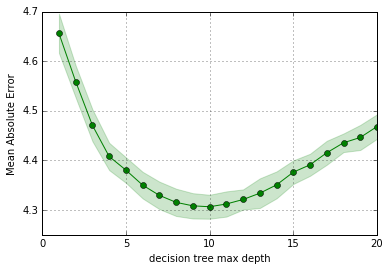

In [5]:
max_depths = range(1,21)
X2 = X**2
cv = ShuffleSplit(n = X2.shape[0], n_iter=5, test_size=0.2, random_state=0)
r = np.array([(np.mean(-j), np.std(-j)) for j in [cross_val_score(RandomForestRegressor(max_depth=i),
                                                                X2,
                                                                Y['PUNT_BIOLOGIA'],
                                                                cv=cv,
                                                                scoring = 'mean_absolute_error')
                                               for i in max_depths]])
plt.plot(max_depths, r[:,0], "o-", color="green", label="test")
plt.grid()
plt.fill_between(max_depths, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
plt.xlabel("decision tree max depth")
plt.ylabel("Mean Absolute Error")

In [6]:
print('The mean value is:', np.min(r[:,0]))
print(r)

The mean value is: 4.30656197669
[[ 4.65615686  0.03971673]
 [ 4.55891625  0.03225935]
 [ 4.47071176  0.03216941]
 [ 4.40794536  0.02752382]
 [ 4.38045901  0.02568901]
 [ 4.35017121  0.02681397]
 [ 4.32949331  0.02768458]
 [ 4.31543046  0.0275042 ]
 [ 4.30839232  0.02549947]
 [ 4.30656198  0.02412807]
 [ 4.31210408  0.02541966]
 [ 4.32119041  0.02032318]
 [ 4.33390626  0.02985652]
 [ 4.35066083  0.02712345]
 [ 4.37624941  0.02379636]
 [ 4.39114588  0.02222071]
 [ 4.41539242  0.0241315 ]
 [ 4.43551176  0.01875158]
 [ 4.44623909  0.02527727]
 [ 4.46821014  0.02467209]]


** So the depth will be fixed as 11 in the next tests**

Random Forest Regressor+ New Data powered to 2 + ShuffleSplit + max_depth 11

The Model with the Data raised to the power of 2 gives:
Mean Score: 4.33485293047
This tooks 8.970175504684448


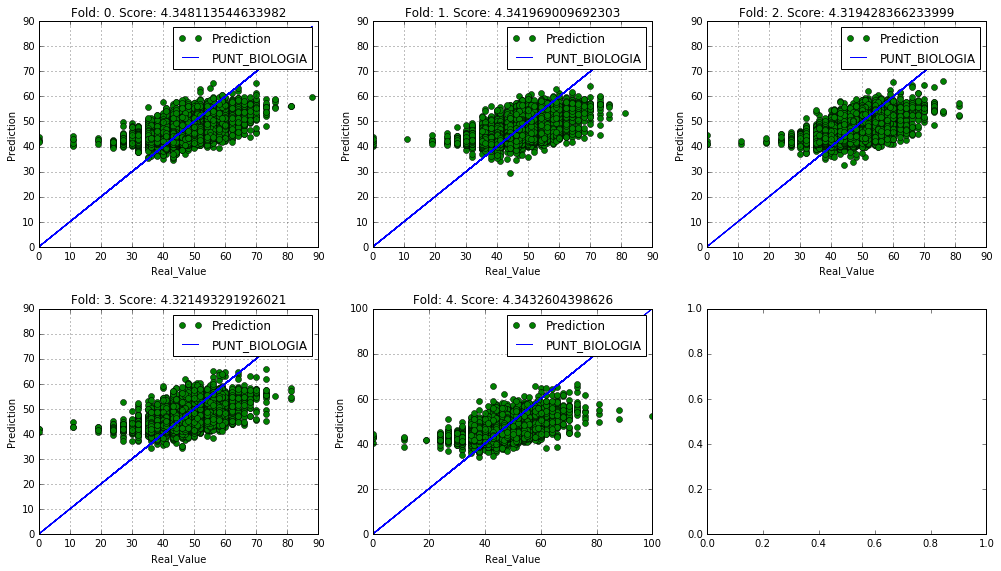

In [27]:
st = time()
rf = RandomForestRegressor(max_depth=11, n_jobs=4)
get_exp_prediction2(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, shuffle_split = True)
print('This tooks', time()-st)

Random Forest Regressor + New Data + Polynomial Features degree 2 + KFold Shuffle True + max_depth 11

The Model with the new "PolyData" with degree 2 gives:
Mean Score: 4.34814032322
The prediction took: 134.22167301177979 seconds


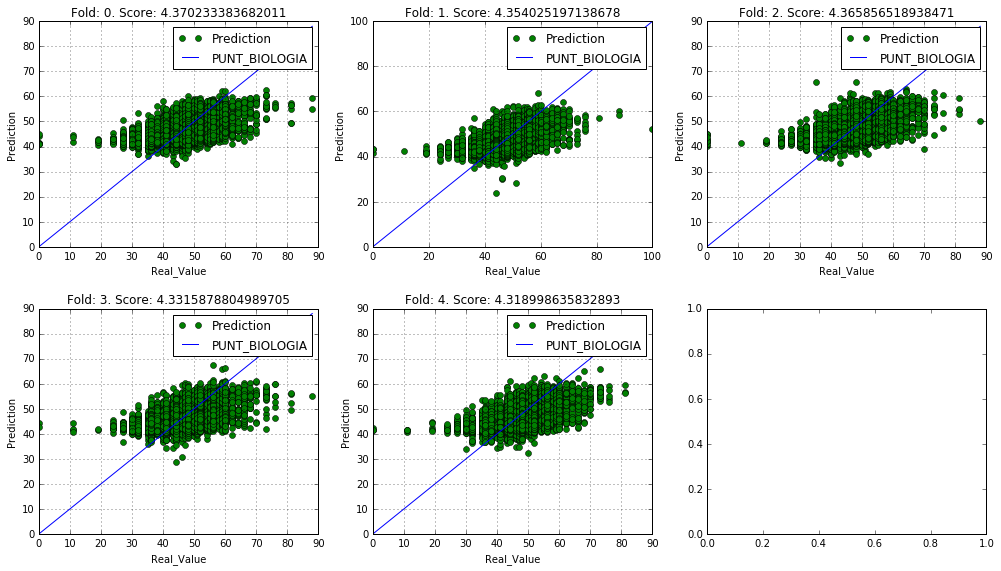

In [30]:
rf = RandomForestRegressor(n_jobs=4, max_depth=11)
get_Poly_prediction2(rf, 2, S_data, 'PUNT_BIOLOGIA', 5, KFShuffle=True)

Random Forest Regressor with Maxdepth 11 + Old Data + PCA of 33 components + ShuffleSplit

Mean Score: 4.37000846015
This one takes: 37.48181104660034


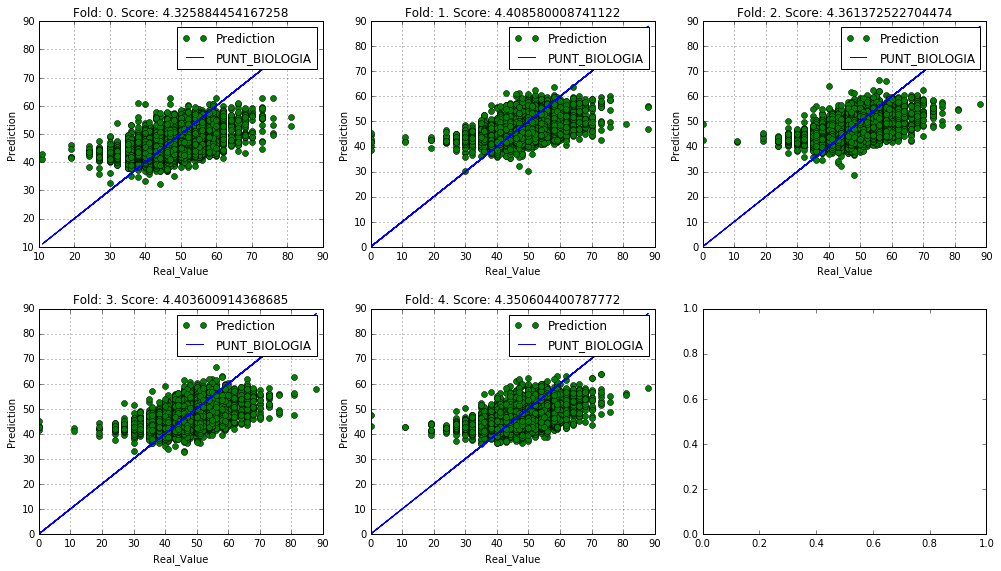

In [31]:
st = time()
pca = PCA(n_components=33)
pca_X = pca.fit_transform(X)
pca_X = pd.DataFrame(pca_X)
dt = RandomForestRegressor(max_depth=11, n_jobs=4)
rs = ShuffleSplit(n = pca_X.shape[0], n_iter=5, test_size=0.2)
plot_predictions_KF(dt, 'PUNT_BIOLOGIA', pca_X, Y, rs)
print('This one takes:', time()-st)

We can see an improvement in both ways of prediction.

In [6]:
New_x_list = ['ESTU_GENERO', 'ESTU_ACT_PROX_ANNO', 'COD_INTERDISCIPLINAR', 'COLE_CARACTER', 'ESTU_RESIDE_DEPTO',
              'FAMI_APORTANTES', 'FAMI_NUM_HERMANOS_EDUSUPERIOR', 'COLE_JORNADA', 'FAMI_OCUPA_MADRE', 'ESTU_CARRDESEADA_RAZON',
              'FAMI_PERSONAS_HOGAR', 'ESTU_RAZONINSTITUTO', 'FAMI_OCUPA_PADRE', 'FAMI_EDUCA_PADRE' 'FAMI_NUM_HERMANOS',
              'FAMI_EDUCA_MADRE', 'COLE_VALOR_PENSION', 'ESTU_RESIDE_MCPIO', 'ESTU_NACIMIENTO_MES',
              'ESTU_IES_COD_DESEADA', 'ESTU_NACIMIENTO_DIA', 'ESTU_NACIMIENTO_ANNO', 'ESTU_CARRDESEADA_COD',
              'COLE_COD_ICFES', 'FAMI_INGRESO_FMILIAR_MENSUAL']

y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
              'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']

New_X = S_data.filter(items = New_x_list)
Y_train = S_data.filter(items = y_list)

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

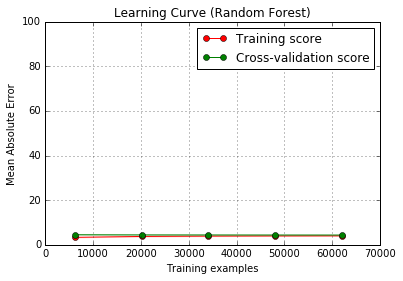

In [9]:
title = "Learning Curve (Random Forest)"
pca = PCA(n_components=33)
pca_X = pca.fit_transform(X)
pca_X = pd.DataFrame(pca_X)
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n = pca_X.shape[0], n_iter=5, test_size=0.2, random_state=0)

estimator = RandomForestRegressor(n_jobs=4, max_depth = 11)
plot_learning_curve(estimator, title, pca_X, Y_train['PUNT_BIOLOGIA'], ylim=(0, 100), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/home/aronf/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

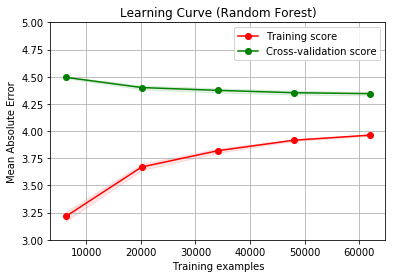

In [10]:
title = "Learning Curve (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
X2 = New_X**2
rs = ShuffleSplit(n_splits=5, test_size=0.2)
cv = rs.split(X2)

estimator = RandomForestRegressor(n_jobs=4, max_depth = 11)
plot_learning_curve(estimator, title, X2, Y_train['PUNT_BIOLOGIA'], ylim=(3, 5), cv=cv, n_jobs=4)

# Results

The 2 best algorithms are:  

|BEST ALGORITHMS            |Score[MAE]/time[s]    |Score[MAE]/time[s]    |Score[MAE]/time[s]    |
|--------------------------:|---------------------:|---------------------:|---------------------:|
|**Algorithm**              |EXP 2/ ShuffleSplit   |Poly 2/KFoldShuffle   |PCA - 33 Components   |
|**Old Data**               |4.53 / 44.38          |4.51 / 1417.17        |4.43/23.58            |
|**New X Data**             |4.52 / 35.60          |4.54 / 703.70         |ERROR-Just 25 features|
|**New X Data/max_depth 11**|4.33 / 8.97           |4.34 / 134.22         |----------------------|
|**Old Data/max_depth 11**  |----------------------|----------------------|4.37/37.48            |

# Conclusion

The **CHOSEN** way to predict:

* Random Forest Regressor *max_depth* 11 + New Data powered to 2 + ShuffleSplit

Last Score Obtained: 

|Score[MAE]|Time[s]|
|---------:|------:|
|4.33      |8.97  |

Metric used: 

* For the score was used the **Mean Absolute Error (MAE)** 
* For the time was used the **seconds unit (s)**